##### 데이터 준비

In [25]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target,
                                                                    test_size=0.2, random_state=42)

In [26]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

#### LSTM 셀을 사용한 순환층

In [27]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length = 100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_5 (LSTM)               (None, 8)                 800       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [29]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
earlystopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data = (val_seq, val_target),
                    callbacks=[checkpoint_cb, earlystopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 30ms/step - loss: 0.6928 - accuracy: 0.5298 - val_loss: 0.6925 - val_accuracy: 0.5814
Epoch 2/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6919 - accuracy: 0.5907 - val_loss: 0.6913 - val_accuracy: 0.5976
Epoch 3/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6899 - accuracy: 0.6141 - val_loss: 0.6882 - val_accuracy: 0.6386
Epoch 4/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6834 - accuracy: 0.6452 - val_loss: 0.6771 - val_accuracy: 0.6168
Epoch 5/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6515 - accuracy: 0.6678 - val_loss: 0.6319 - val_accuracy: 0.7052
Epoch 6/100
313/313 [==============================] - 9s 30ms/step - loss: 0.6141 - accuracy: 0.7253 - val_loss: 0.6071 - val_accuracy: 0.7218
Epoch 7/100
313/313 [==============================] - 9s 28ms/step - loss: 0.5905 - accuracy: 0.7366 - val_loss: 0.5864 - val_accuracy

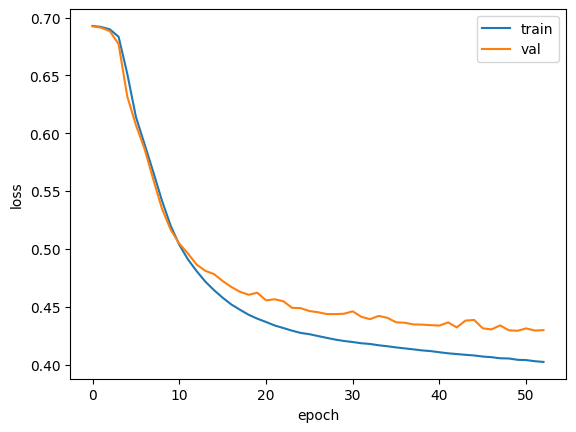

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

##### 순환층 + 드롭아웃

In [31]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [32]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
earlystopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data = (val_seq, val_target),
                    callbacks=[checkpoint_cb, earlystopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 30ms/step - loss: 0.6928 - accuracy: 0.5203 - val_loss: 0.6925 - val_accuracy: 0.5282
Epoch 2/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6917 - accuracy: 0.5543 - val_loss: 0.6912 - val_accuracy: 0.5810
Epoch 3/100
313/313 [==============================] - 10s 30ms/step - loss: 0.6899 - accuracy: 0.5872 - val_loss: 0.6888 - val_accuracy: 0.6108
Epoch 4/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6859 - accuracy: 0.6220 - val_loss: 0.6829 - val_accuracy: 0.6362
Epoch 5/100
313/313 [==============================] - 10s 30ms/step - loss: 0.6738 - accuracy: 0.6467 - val_loss: 0.6597 - val_accuracy: 0.6664
Epoch 6/100
313/313 [==============================] - 9s 30ms/step - loss: 0.6213 - accuracy: 0.6977 - val_loss: 0.5973 - val_accuracy: 0.7242
Epoch 7/100
313/313 [==============================] - 9s 29ms/step - loss: 0.5841 - accuracy: 0.7237 - val_loss: 0.5729 - val_accur

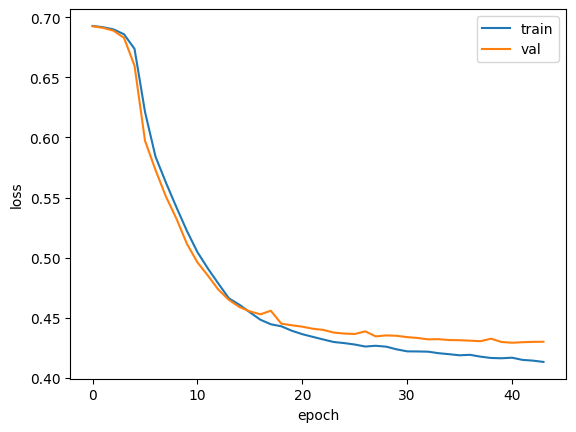

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

##### 2개의 층 연결

In [34]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [35]:
model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_7 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_8 (LSTM)               (None, 8)                 544       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [36]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
earlystopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data = (val_seq, val_target),
                    callbacks=[checkpoint_cb, earlystopping_cb])

Epoch 1/100
313/313 [==============================] - 23s 63ms/step - loss: 0.6931 - accuracy: 0.5112 - val_loss: 0.6930 - val_accuracy: 0.5198
Epoch 2/100
313/313 [==============================] - 18s 58ms/step - loss: 0.6927 - accuracy: 0.5280 - val_loss: 0.6922 - val_accuracy: 0.5492
Epoch 3/100
313/313 [==============================] - 19s 59ms/step - loss: 0.6904 - accuracy: 0.5746 - val_loss: 0.6875 - val_accuracy: 0.6004
Epoch 4/100
313/313 [==============================] - 19s 60ms/step - loss: 0.6712 - accuracy: 0.6333 - val_loss: 0.6426 - val_accuracy: 0.6674
Epoch 5/100
313/313 [==============================] - 18s 58ms/step - loss: 0.6076 - accuracy: 0.6956 - val_loss: 0.5845 - val_accuracy: 0.7124
Epoch 6/100
313/313 [==============================] - 19s 59ms/step - loss: 0.5693 - accuracy: 0.7236 - val_loss: 0.5532 - val_accuracy: 0.7338
Epoch 7/100
313/313 [==============================] - 18s 57ms/step - loss: 0.5430 - accuracy: 0.7437 - val_loss: 0.5322 - val_ac

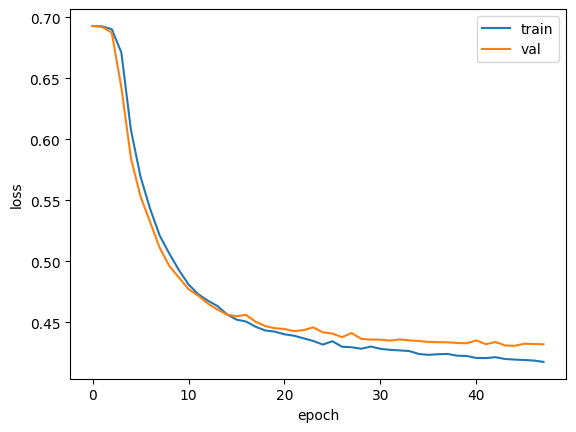

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

#### GRU 셀

In [38]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [39]:
model4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru_1 (GRU)                 (None, 8)                 624       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [40]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
earlystopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data = (val_seq, val_target),
                    callbacks=[checkpoint_cb, earlystopping_cb])

Epoch 1/100
313/313 [==============================] - 12s 34ms/step - loss: 0.6926 - accuracy: 0.5207 - val_loss: 0.6918 - val_accuracy: 0.5568
Epoch 2/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6909 - accuracy: 0.5651 - val_loss: 0.6899 - val_accuracy: 0.5774
Epoch 3/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6885 - accuracy: 0.5764 - val_loss: 0.6874 - val_accuracy: 0.5888
Epoch 4/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6848 - accuracy: 0.5945 - val_loss: 0.6831 - val_accuracy: 0.5986
Epoch 5/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6790 - accuracy: 0.6112 - val_loss: 0.6766 - val_accuracy: 0.6064
Epoch 6/100
313/313 [==============================] - 9s 30ms/step - loss: 0.6704 - accuracy: 0.6246 - val_loss: 0.6671 - val_accuracy: 0.6152
Epoch 7/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6577 - accuracy: 0.6395 - val_loss: 0.6533 - val_acc

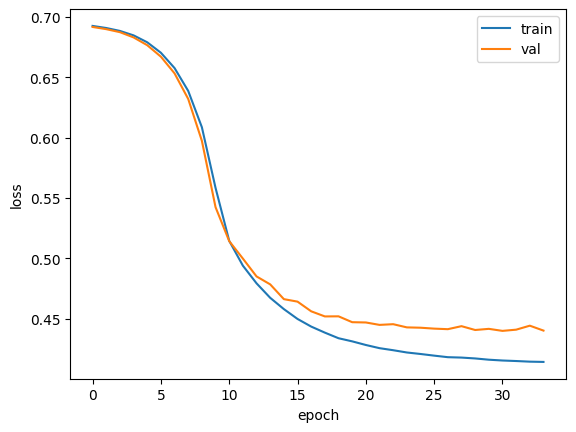

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [42]:
# 테스트 세트 성능
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 8s 10ms/step - loss: 0.4268 - accuracy: 0.8006


[0.42676258087158203, 0.8005599975585938]